# Práctica 2: Regresión multivariable.

Greta y Héloïse

Grupo 2

# Leer el contenido del archivo

In [548]:
import numpy as np
from pandas.io.parsers import read_csv

datos = read_csv("data2.csv", header=None).to_numpy()
print(datos.shape)
print(datos[:10])

(47, 3)
[[  2104      3 399900]
 [  1600      3 329900]
 [  2400      3 369000]
 [  1416      2 232000]
 [  3000      4 539900]
 [  1985      4 299900]
 [  1534      3 314900]
 [  1427      3 198999]
 [  1380      3 212000]
 [  1494      3 242500]]


# Normalizacion de los datos

In [478]:
def normalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Método de descenso de gradiente

In [556]:
def cost(x,y,w,b):
    f_wb = np.dot(x,w)+b
    J = np.sum(np.square(f_wb-y)) / (2*len(y))
    return J

In [558]:
def gradient_descent(data, alpha, max_iter):
    X, Y = normalize(data[:, :-1])[0],data[:, -1]
    m,n = np.shape(X)
    w, tmp_w = np.zeros(n), np.zeros(n)
    b = 0
    J_history = []
    
    for iter in range(max_iter):
        f_wb = np.dot(X, w) + b
        dJ_w = np.dot((f_wb - Y), X) / m
        dJ_b = np.sum((f_wb - Y)) / m
        tmp_w = w - alpha * dJ_w
        tmp_b = b - alpha * dJ_b
        w, b = tmp_w, tmp_b
        J_history.append(cost(X, Y, w, b)) 
    return w, b, J_history

# Regrésion lineal para el conjunto de datos

Cost before regression: 65591548106.45744 (w=0,b=0)
Cost after regression: 2105448288.6292474 (w_min= [99411.44947359  3267.01285407] , b_min= 334302.06399327697 )



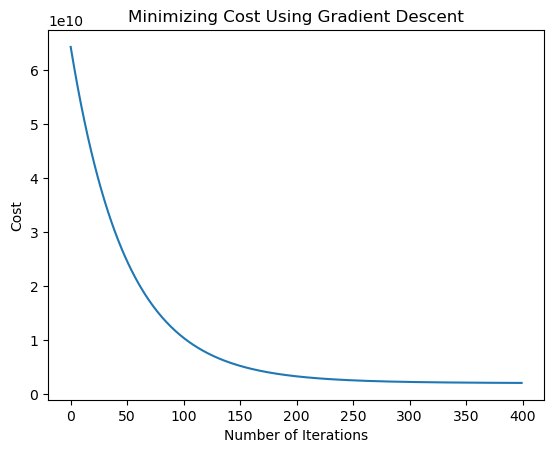

In [584]:
# Gradient Descent Method for Linear Regression
learning_rate = 0.01
max_iter = 400
w_min, b_min, J_history = gradient_descent(datos, learning_rate, max_iter)

X, Y = normalize(datos[:, :-1])[0],datos[:, -1]
mu, sigma = normalize(datos[:, :-1])[1:]
print('Cost before regression:', cost(X,Y,[0, 0], 0), '(w=0,b=0)')
print('Cost after regression:', cost(X,Y,w_min,b_min), '(w_min=',w_min,', b_min=', b_min,')\n')

# Plot the resulting minimal cost function
plt.plot(J_history)
plt.ylabel('Cost')
plt.xlabel('Number of Iterations')
plt.title('Minimizing Cost Using Gradient Descent')
plt.show()

In [585]:
# Verify a point
learning_rate = 0.3
max_iter = 1500
w_ej, b_ej, _ = gradient_descent(datos, learning_rate, max_iter)
ej = np.array([1650, 3])
ej = (ej-mu)/sigma
ej = np.dot(ej,w_ej) + b_ej
print('Para una casa con una superficie de 1.650 pies cuadrados y 3 habitaciones (x1=1650,x2=3), predice un valor aproximado de 293098.46 $, averiguamos: ', "%.2f" %  ej, '.') 


Para una casa con una superficie de 1.650 pies cuadrados y 3 habitaciones (x1=1650,x2=3), predice un valor aproximado de 293098.46 $, averiguamos:  293081.46 .


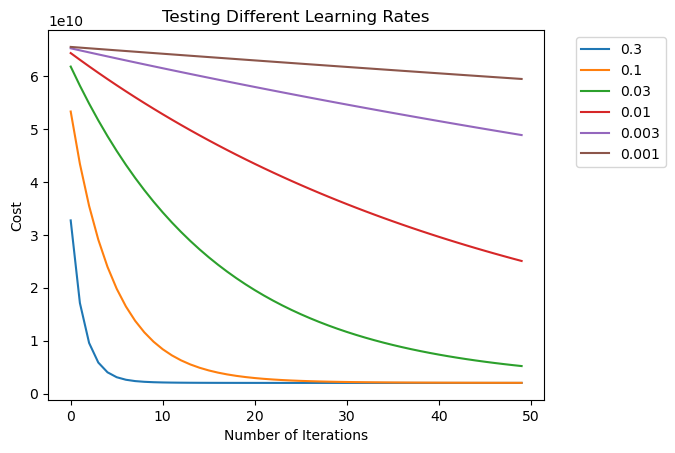

In [572]:
# Test Different Learning Rates
J_values = []
alpha_values = [0.3, 0.1, 0.03, 0.01, 0.003, 0.001]
max_iter = 50
for alpha in alpha_values:
    w, b, J = gradient_descent(datos,alpha, max_iter)
    J_values.append(J)
    plt.plot(J,label=str(alpha))
plt.title('Testing Different Learning Rates')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.show()